In [ ]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pylab as plt
import imageio
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import patoolib  
patoolib.extract_archive('Data.zip')

patool: Extracting Data.zip ...
patool: running /usr/bin/7z x -o./Unpack_hq1z2n1a -- Data.zip
patool: ... Data.zip extracted to `Data1' (local file exists).


'Data1'

# New section

**TRAINING
**

In [ ]:
Path = "./Data/Train/"
Images = []
for i in range(1,2401): 
    NewPath= Path + '{}.jpg'.format(i)
    img = imageio.imread(str(NewPath))
    image= np.array(img)
    imageflatten = image.flatten().reshape(1,784)
    Images.append(imageflatten)	

In [ ]:
ImagesArray = np.array(Images).reshape(2400,784)



In [ ]:
def Mean(list):
    ClassMean = np.round((np.sum(list, axis = 0, keepdims = True))/(len(list)),decimals=8)
    return ClassMean

In [ ]:
def Seperation (Images):
	SeperatedClass  = [Images[start:start+240] for start in range(0,len(Images),240)]
	return SeperatedClass

In [ ]:
W0 = []
W1 = []
Class1=[]
Class2=[]  
Mean1=[]
Mean2=[]
S1 = np.zeros((784,784))
S2 = np.zeros((784,784))


In [ ]:
Data= Seperation(ImagesArray)

for i in range(10):
    
    Class1Array = Data[i]
    Class1.append(Class1Array)

    M1Array = Mean(Class1[i])
    Mean1.append(M1Array)
    
    C2Array= [value for index,value in enumerate(Data) if index!= i]
    C2Array2=np.array(C2Array).reshape(2160,784)
    Class2.append(C2Array2)
       
    Mean2Array = Mean(Class2[i])
    Mean2.append(Mean2Array)
    
    S1 = S1 + np.dot((np.subtract(Class1[i], Mean1[i])).T.reshape(784,240), np.subtract(Class1[i], Mean1[i]).reshape(240,784))
    S2 = S2 + np.dot((np.subtract(Class2[i], Mean2[i])).T.reshape(784,2160), np.subtract(Class2[i],Mean2[i]).reshape(2160,784))
    Sw = S1 + S2
    Sw_inv = np.linalg.pinv(Sw)
    
    Wa = np.dot(Sw_inv,(np.subtract(Mean2[i],Mean1[i]).T))
    W1.append(Wa)
   
    Wb = -.5 * np.dot(sum(Mean1[i], Mean2[i]),np.array(Wa))
    W0.append(Wb)


In [ ]:
TrainingLabelsPath = 'Training Labels.txt'
pred = []
TrainingLabels = np.loadtxt(Path+TrainingLabelsPath)
for j in range(len(TrainingLabels)):
    Final= []
    for k in range(10):
        FinalCalc= (np.dot(Images[j],W1[k])) + W0[k]
        Final.append(FinalCalc)
    pred.append(Final.index(min(Final)))

print((accuracy_score(pred,TrainingLabels)*100),0)


96.33333333333334 0


In [ ]:
Data = Seperation(ImagesArray)

for i in range(10):
  
    Class1Array = Data[i]
    Class1.append(Class1Array)

    M1Array = Mean(Class1[i])
    Mean1.append(M1Array)
    
    C2Array= [value for index,value in enumerate(Data) if index!= i]
    C2Array2=np.array(C2Array).reshape(2160,784)
    Class2.append(C2Array2)
       
    Mean2Array = Mean(Class2[i])
    Mean2.append(Mean2Array)
    
  
    S1 = S1 + np.dot((np.subtract(Class1[i], Mean1[i])).T.reshape(784,240), np.subtract(Class1[i], Mean1[i]).reshape(240,784))
    S2 = S2 + np.dot((np.subtract(Class2[i], Mean2[i])).T.reshape(784,2160), np.subtract(Class2[i],Mean2[i]).reshape(2160,784))
    Sw = S1 + S2
    Sw_inv = np.linalg.pinv(Sw)

    
    W = np.dot(Sw_inv,(np.subtract(Mean2[i],Mean1[i]).T))
    W1.append(W)
   



In [ ]:
TrainingLabelsPath = 'Training Labels.txt'
pred = []
TrainingLabels = np.loadtxt(Path+TrainingLabelsPath)
for j in range(len(TrainingLabels)):
    Final= []
    for k in range(10):
        FinalCalc= (np.dot(Images[j],W1[k]))
        Final.append(FinalCalc)
    pred.append(Final.index(min(Final)))

print((accuracy_score(pred,TrainingLabels)*100),0)

87.0 0


TESTING

In [ ]:
Path2= "./Data/Test/"
list_of_images_testing = []
for u in range(1,201): 
    im_path_test = Path2+ '{}.jpg'.format(u)
    im_test = imageio.imread(str(im_path_test))
    im_numpy_test = np.array(im_test)
    im_numpy_flatten_test = im_numpy_test.flatten().reshape(1,784)
    list_of_images_testing.append(im_numpy_flatten_test)
Alltestingimages = np.array(list_of_images_testing).reshape(200,784)


In [ ]:
Testpath = 'Test Labels.txt'
pred2 = []
testlabels = np.loadtxt(Path2+Testpath)
for y in range(len(testlabels)):
    labeltesting = []
    for z in range(10):
        testingCalc = (np.dot(W1[z].T,Alltestingimages[y])) + W0[z]
        labeltesting.append(testingCalc)
    pred2.append(np.argmin(labeltesting))
print((accuracy_score(pred2,testlabels)*100),0)

82.0 0


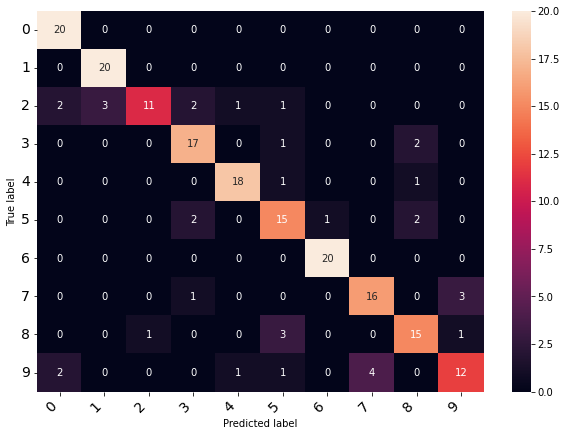

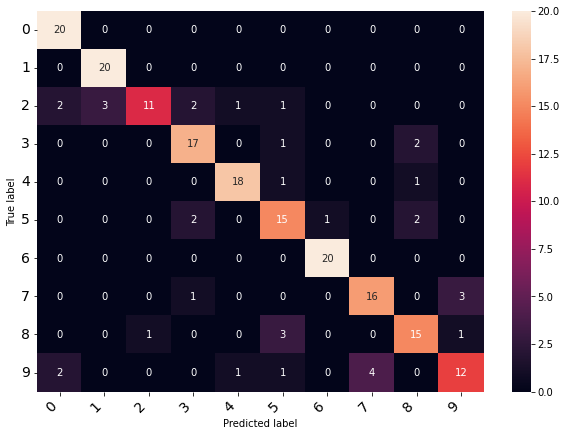

In [ ]:
test_confusion_matrix = confusion_matrix(testlabels, pred2)
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig 

print_confusion_matrix(test_confusion_matrix, [0,1,2,3,4,5,6,7,8,9])

In [ ]:
Testpath = 'Test Labels.txt'
pred2 = []
testlabels = np.loadtxt(Path2+Testpath)
for y in range(len(testlabels)):
    labeltesting = []
    for z in range(10):
        testingCalc = (np.dot(W1[z].T,Alltestingimages[y])) 
        labeltesting.append(testingCalc)
    pred2.append(np.argmin(labeltesting))
print((accuracy_score(pred2,testlabels)*100),0)

65.0 0


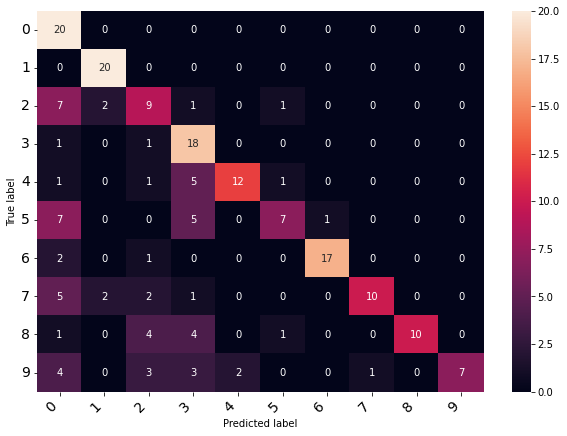

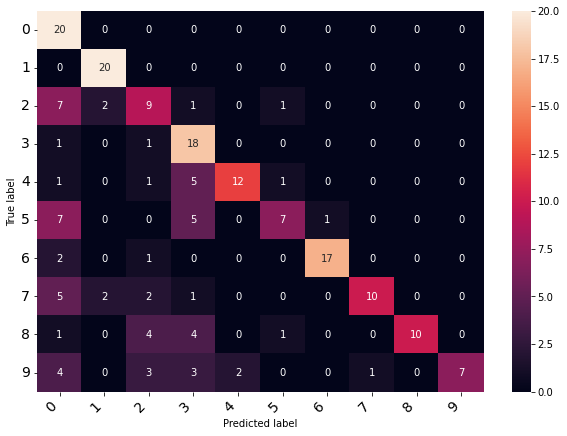

In [ ]:
test_confusion_matrix = confusion_matrix(testlabels, pred2)
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

print_confusion_matrix(test_confusion_matrix, [0,1,2,3,4,5,6,7,8,9])

Adding the bias term had a much higher accurcy in the training phase but slightly lower in thetraining phase but after looking at both confusion matrices , we can see that adding a bias term increases overall accurcy by having a better predictions by almost 90 % than not adding it .